In [1]:
import sys, os
from pathlib import Path
# from html.parser import HTMLParser
import textwrap
import random
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
from datetime import datetime
from datetime import timedelta
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))
import umap
from tabulate import tabulate
from tqdm.notebook import tqdm
import yfinance as yf
import pandas as pd
# from scipy.optimize import linear_sum_assignment
from thefuzz import fuzz

from src import yahoo

# from ew_etfs import INDEX, ETF, CACHE


In [2]:
etfnames = [#'GREK', 
    'PGAL', 'EWP', 'EWQ', 'EWK', 'EWO', 'EWN', 'EWI', 'EWG']
tknames = ['ABI.BR', 'EBS.VI', 'EDP.LS', 'ASML.AS', 'IBE.MC', 'EDPR.LS', 'SAN.MC', 'ENEL.MI', 'OMV.VI', 'ISP.MI', 'MC.PA', 'BBVA.MC', 'KBC.BR', 'VER.VI', 'PRX.AS', 'STLA.MI', 'ENI.MI', 'SAP.DE', 'SIE.DE', 'INGA.AS', 'TTE.PA', 'ALV.DE', 'UCB.BR', 'SAN.PA', 'ARGX.BR', 'UCG.MI', 'OR.PA', 'GALP.LS', 'JMT.LS', 'ADYEN.AS', 'CABK.MC', 'TEF.MC', 'RENE.LS', 'NVG.LS', 'SON.LS', 'REP.MC', 'BAS.DE', 'AD.AS', 'G.MI', 'SU.PA', 'NOS.LS', 'BCP.LS', 'DAI.DE', 'ANDR.VI', 'BG.VI', 'CTT.LS', 'AMS.MC', 'GBLB.BR', 'AENA.MC', 'WIE.VI', 'VOE.VI', 'ALTR.LS', 'DSM.AS', 'SOLB.BR', 'DTE.DE', 'FER.MC', 'AI.PA', 'BNP.PA', 'RACE.MI', 'BAYN.DE', 'DPW.DE', 'COR.LS', 'RBI.VI', 'AIR.PA', 'ITX.MC', 'CNHI.MI', 'PHIA.AS', 'AGS.BR', 'WKL.AS', 'IFX.DE', 'CLNX.MC', 'IIA.VI', 'ADS.DE', 'HEIA.AS', 'MONC.MI', 'REE.MC', 'UMI.BR', 'SOF.BR', 'CS.PA', 'ELE.MC', 'WDP.BR', 'NTGY.MC', 'SRG.MI', 'DG.PA', 'MUV2.DE', 'TRN.MI', 'AKZA.AS', 'KER.PA', 'VNA.DE', 'LNZ.VI', 'ACS.MC', 'EL.PA', 'CAI.VI', 'TKA.VI', 'VOW3.DE', 'POST.VI', 'EXO.MI', 'FBK.MI', 'ATL.MI', 'ACKB.BR', 'RMS.PA', 'GRF.MC', 'ASM.AS', 'NN.AS', 'SGRE.MC', 'BMW.DE', 'PRY.MI', 'RI.PA', 'DB1.DE', 'ENG.MC', 'ELI.BR', 'SEM.LS', 'SPI.VI', 'UQA.VI', 'ATS.VI', 'VIG.VI', 'AED.BR', 'SAF.PA', 'EOAN.DE', 'GVOLT.LS', 'UMG.AS', 'BN.PA', 'COFB.BR', 'MB.MI', 'DIE.BR', 'EVN.VI', 'PST.MI', 'DBK.DE', 'MRK.DE', 'CPR.MI', 'NEXI.MI', 'RWE.DE', 'CAP.PA', 'TEN.MI', 'CCEP.AS', 'SGO.PA', 'KPN.AS', 'PROX.BR', 'REC.MI', 'DSY.PA', 'STM.PA', 'DOC.VI', 'AGN.AS', 'AMP.MI', 'GLE.PA', 'IMCD.AS', 'TIT.MI', 'ML.PA', 'ENGI.PA', 'LR.PA', 'AER.AS', 'EGL.LS', 'TKWY.AS', 'HEIO.AS', 'SHL.DE', 'VIE.PA', 'COLR.BR', 'SBO.VI', 'ORA.PA', 'VGP.BR', 'RAND.AS', 'ABN.AS', 'ZAL.DE', 'MELE.BR', 'DIA.MI', 'FRE.DE', 'PAL.VI', 'TEP.PA', 'INW.MI', 'LIGHT.AS', 'ASRNL.AS', 'BESI.AS', 'SY1.DE', 'AALB.AS', 'TNET.BR', 'DTG.DE', 'HEN3.DE', 'BEKB.BR', 'KBCA.BR', 'PAH3.DE', 'SRT3.DE', 'FME.DE', 'ACA.PA', 'IBS.LS', 'EURN.BR', 'SEM.VI', 'BNR.DE', 'MONT.BR', 'DHER.DE', 'HNR1.DE', 'BAR.BR', 'POS.VI', 'AGR.VI', 'ZAG.VI', 'PUB.PA', '1COV.DE', 'QGEN.DE', 'MTX.DE', 'PUM.DE', 'HFG.DE', 'FACC.VI', 'GIMB.BR', 'CON.DE', 'XIOR.BR', 'HEI.DE', 'ARCAD.AS', 'CFEB.BR', 'ERF.PA', 'NBA.LS', 'PHR.LS', 'BEI.DE', 'LEG.DE', 'FAGR.BR', 'OCI.AS', 'VOW.DE', 'DIM.PA', 'XTSLA.PA', 'BFIT.AS', 'CA.PA', 'SNC.LS', 'ENR.DE', 'WLN.PA', 'CBK.DE', 'KIN.BR', 'INTER.AS', 'XTSLA.MC', 'HEN.DE', 'TWEKA.AS', 'ACCEL.AS', 'REC.BR', 'BEFB.BR', 'PNL.AS', 'EDEN.PA', 'RET.BR', 'RAM.LS', 'SBMO.AS', 'ALO.PA', 'VIV.PA', 'VPK.AS', 'HO.PA', 'KBX.DE', 'JDEP.AS', 'BOKA.AS', 'CRBN.AS', 'G1A.DE', 'URW.PA', 'EVK.DE', 'BPOST.BR', 'AKE.PA', 'TESB.BR', 'INTO.BR', 'KGX.DE', 'ECMPA.AS', 'FGR.PA', 'AFX.DE', 'BVI.PA', 'BAMNB.AS', 'ENX.PA', 'SW.PA', 'AT1.DE', 'AGFB.BR', 'AMG.AS', 'EN.PA', 'ECONB.BR', 'FLOW.AS', 'RNO.PA', 'ALFEN.AS', 'NEM.DE', 'G24.DE', 'GET.PA', 'MITRA.BR', 'NSI.AS', 'LXS.DE', 'BMW3.DE', 'ONTEX.BR', 'VLK.AS', 'BC8.DE', 'IMMO.BR', 'FUR.AS', 'AC.PA', 'FR.PA', 'GFC.PA', 'LHA.DE', 'HTOO.LS', 'TOM2.AS', 'INPST.AS', 'IBAB.BR', 'SHUR.BR', 'SLIGR.AS', 'RAA.DE', 'UN01.DE', 'OBEL.BR', 'VAN.BR', 'PHARM.AS', 'UBI.PA', 'LI.PA', 'UTDI.DE', 'EO.PA', 'WHA.AS', 'BIM.PA', 'RCO.PA', 'BOL.PA', 'AMUN.PA', 'SEV.PA', 'EDF.PA', 'CNP.PA', 'COV.PA', 'ADP.PA', 'SK.PA', 'O2D.DE', 'FPE3.DE', 'FDJ.PA', 'IPN.PA', 'RF.PA', 'CMCOM.AS', 'VASTN.AS', 'MF.PA', 'AM.PA', 'BRNL.AS', 'ORP.PA', 'BSGR.AS', 'FAST.AS', 'FFARM.AS', 'SIFG.AS',
          'NESN.SW']

In [3]:
# date = '220208'

In [4]:
etfs = [yahoo.load_portfolio(name) for name in tqdm(etfnames)]
etftickers = {name: etf for name, etf in zip(etfnames,etfs)}

  0%|          | 0/8 [00:00<?, ?it/s]

In [5]:
full = [yahoo.download(t, date='last', pbar=None) for t in tqdm(tknames)]
tickers = {tk.ticker: tk for tk in full}

def find(ident, tks=None):
    if tks is None:
        tks = tickers
    ident = ident.upper()
    if ident in tks:
        return tks[ident]
    prefixes = {k.split('.')[0]:v for k,v in tks.items()}
    if ident in prefixes:
        return prefixes[ident]
    raise KeyError(ident)

len(full)

  0%|          | 0/325 [00:00<?, ?it/s]

325

In [6]:
tk = full[0]
tk.ticker

'ABI.BR'

In [7]:
etf = etftickers['EWG']
tksel = [tickers[name] for name, ratio in sorted(etf['portfolio'].items(), reverse=True, key=lambda x: (x[1], x[0]))]
# tks

In [8]:
def join_signals(tks, col='Close'):
    df = None
    for tk in tks:
        sig = tk.history[col]
        if df is None:
            df = sig.rename(tk.ticker)
        else:
            df1, df2 = df, tk.history[col]
            df = pd.merge_asof(df1, df2, left_index=True, right_index=True, tolerance=pd.Timedelta("5m"))
            df.rename(columns={col: tk.ticker}, inplace=True)
    return df
    pass

In [9]:
base_sectors = [
    'Technology', 
    'Healthcare',
    'Industrials', 
    'Financial Services', 
    'Communication Services', 
    'Consumer Cyclical', 
    'Consumer Defensive', 
    'Basic Materials', 
    'Utilities', 
    'Energy', 
    'Real Estate',
    None,
]
rmarks = ["o","v","^","<",">","8","s","p","P","*","h","H","X","D","d"]
rcolors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']
seccolors = {b:c for b,c in zip(base_sectors, rcolors)}

sector_aliases = {
    'Financial': 'Financial Services',
    'Consumer Discretionary': 'Consumer Cyclical',
    '': None,
    'Services': 'Consumer Cyclical',
    'Industrial Goods': 'Industrials',
    'Consumer Goods': 'Consumer Defensive',
}

In [10]:
from sklearn.preprocessing import normalize
from sklearn import manifold
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import patches as mpatches

import numpy

In [11]:
bad = {'QGEN.DE', 'AER.AS', 'XTSLA.PA', 'XTSLA.MC', 'URW.PA', 'HTOO.LS'}#'DTG.DE'}

In [12]:
tks = [f for f in full if f.ticker not in bad]

In [188]:
df = join_signals(tks, col='Close')
pts = df
pts = df[df.index.year == 2021]
cr = pts.corr()
pts = pts.to_numpy()
mat = cr.to_numpy()

In [189]:
np.argwhere(np.isnan(mat))

array([], shape=(0, 2), dtype=int64)

In [190]:
bidx = np.argwhere(np.isnan(mat).sum(-1)>0).reshape(-1)
bidx

array([], dtype=int64)

In [191]:
pts.shape

(258, 319)

In [131]:
# model = manifold.MDS(n_components=2, random_state=0, metric='precomputed')
# coords = model.fit_transform(2-mat)
# colors = [seccolors[tk.info.get('sector')] for tk in tks]
# plt.figure(figsize=(7, 7))
# plt.scatter(coords[:, 0], coords[:, 1], marker='o', c=colors, s=50, edgecolor='None')
# plt.tight_layout()
# plt.axis('equal');
# # plt.show()

In [18]:

# embedding = umap.UMAP(metric='correlation').fit_transform(fixed.T)
model = umap.UMAP(n_neighbors=8, metric='precomputed').fit(2-mat)
embedding = model.embedding_
embedding.shape

C:\Users\anwan\anaconda3\lib\site-packages\umap\umap_.py:1780: UserWarning: using precomputed metric; inverse_transform will be unavailable
  warn("using precomputed metric; inverse_transform will be unavailable")


(318, 2)

In [19]:
change = pts[-2] / pts[0]
len(change)

318

In [525]:

srcls = rmarks
cats = [tk.info.get('country') for tk in tks]
cat_m = {cat: srcls[i%len(srcls)] for i, cat in enumerate(set(cats))}
# mvals = 'o'
mvals = np.array([cat_m[s] for s in cats])

srcls = rcolors
cats = [tk.info.get('sector') for tk in tks]
cat_cols = {cat: srcls[i%len(srcls)] for i, cat in enumerate(set(cats))}
cvals = np.array([cat_cols[s] for s in cats])


# cvals = change
xvals = change

fg, ax = plt.subplots(figsize=(7, 7))

smn, smx = 1, 200

ok = np.logical_not(np.isnan(xvals))
mn, mx = xvals[ok].min(), xvals[ok].max()
svals = (xvals.copy()-mn) / (mx-mn)
svals = svals*(smx-smn) + smn

nms = []
handles = []
for cat, m in cat_m.items():
    sel = (mvals == m) * np.logical_not(np.isnan(xvals))
    plt.scatter(embedding[sel, 0], embedding[sel, 1], marker=m, 
                c=cvals[sel], 
#                 cmap='jet', vmin=mn, vmax=mx,
                s=svals[sel], edgecolor='None')
    handles.append(plt.plot([],[], marker=m, c='k', ls='', label=cat)[0])
    nms.append(cat)
mleg = plt.legend(handles, nms)
ax.add_artist(mleg)


cats, cols = zip(*cat_cols.items())
handles = [mpatches.Patch(color=c, label=cat) for c in cols]
cleg = plt.legend(handles, cats, loc=3)
ax.add_artist(cleg)

plt.tight_layout()
# plt.colorbar()
plt.axis('equal');
# plt.show()

NameError: name 'change' is not defined

In [21]:
from src import optim
from datetime import datetime

In [22]:
options = tks.copy()
len(options)

318

In [49]:
tk = options[7]
tk.ticker

'ENEL.MI'

In [24]:
current = tk.history['Close'][-2]
current

42.7799987793

In [25]:
peak = tk.history['Close'].max()
days_since_peak = (datetime.now() - tk.history.index[tk.history['Close'].argmax()]).days
peak, days_since_peak

(57.1082572937, 5407)

In [1275]:
feat_keys = [
    'currentPrice',
    'volume',
    'averageVolume', 'averageVolume10days',
    'marketCap',
    'dividendYield',
    'pegRatio', 
    'beta',
    
    'priceToBook', 'payoutRatio',
    'priceToSalesTrailing12Months',
    'ebitdaMargins',
    
    'fiftyDayAverage', 'twoHundredDayAverage',
    
    'fiftyTwoWeekHigh', 'fiftyTwoWeekLow',
    'fullTimeEmployees',
    'heldPercentInsiders', 'heldPercentInstitutions',
    
    'earningsGrowth', 'revenueGrowth',
    'revenuePerShare',
    
    'profitMargins', 'totalCashPerShare',
    'operatingMargins', 'debtToEquity', 'grossMargins',
    'enterpriseToEbitda', 'enterpriseToRevenue',
    
    'trailingAnnualDividendYield', 'trailingEps', 'trailingPE',
    'forwardEps', 'forwardPE',
    
    'numberOfAnalystOpinions',
    'recommendationMean',
    'targetMeanPrice', 'targetMedianPrice',
    'targetLowPrice', 'targetHighPrice',
    
    'bookValue',
    'sharesOutstanding', 
    'grossProfits', 'totalRevenue', 'totalDebt', 'totalCash', 'netIncomeToCommon', 'enterpriseValue',
    
]
categoricals = [
    'country', 'city',
    
    'sector', 'industry',
    
    'quoteType',
    'exchange',
    'currency',
    
]

eye_brow_keys = ['adult', 'alcoholic', 'animalTesting', 'catholic', 'coal', 
                 'furLeather', 'gmo', 'nuclear', 'palmOil', 'pesticides', ]
double_eye_brow_keys = ['controversialWeapons', 'militaryContract', 'gambling', 'smallArms', 'tobacco']
scores = ['environmentScore', 'governanceScore', 'socialScore', 'totalEsg']
percentiles = ['environmentPercentile', 'governancePercentile', 'socialPercentile', ]

def make_sustain_key(key):
    def _sustain_key(tk):
        try:
            val = tk.sustainability['Value'].to_dict()[key]
            if val is None:
                assert False
            return val
        except:
            pass
        return 0.
    _sustain_key.key = key
    return _sustain_key

def _eye_brow(tk):
    try:
        tbl = tk.sustainability['Value'].to_dict()
    except:
        pass
    else:
        return any(tbl.get(k) for k in eye_brow_keys)
def _double_eye_brow(tk):
    try:
        tbl = tk.sustainability['Value'].to_dict()
    except:
        pass
    else:
        return any(tbl.get(k) for k in double_eye_brow_keys)

def eye_brows(tk):
    try:
        tbl = tk.sustainability['Value'].to_dict()
    except:
        pass
    else:
        return [k for k in eye_brow_keys if tbl.get(k)], [k for k in double_eye_brow_keys if tbl.get(k)]
    return [], []
    
sustain_stats = {
    'eye-brow': _eye_brow,
    'double-eye-brow': _double_eye_brow,
    **{s:make_sustain_key(s) for s in scores},
    **{s:make_sustain_key(s) for s in percentiles},
}
# print(tabulate(sorted([k,fn(tk)] for k,fn in sustain_stats.items())))

In [29]:
debs = apply(sustain_stats['double-eye-brow'], tks)
[tk.ticker for tk, deb in zip(tks, debs) if deb]

['AIR.PA', 'CNHI.MI', 'VOW3.DE', 'SAF.PA', 'PAH3.DE', 'MTX.DE', 'HO.PA']

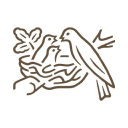

NESN.SW - NESTLE N

Sector: Consumer Defensive
Industry: Packaged Foods

Location: Vevey, Switzerland

Allocation: 0.0%
Yield: 2.3%

Nestlé S.A.

NestlÃ© S.A., together with its subsidiaries, operates as a food and beverage company. The company operates through Zone
Europe, Middle East and North Africa; Zone Americas; Zone Asia, Oceania and sub-Saharan Africa; and NestlÃ© Waters
segments. It offers baby foods under the Cerelac, Gerber, and NaturNes brands; bottled water under the NestlÃ© Pure
Life, Perrier, Poland Spring, and S.Pellegrino brands; cereals under the Fitness, Nesquik, cheerios, and Lion Cereals
brands; and chocolate and confectionery products under the KitKat, Nestle L'atelier, Nestle Toll House, Milkybar,
Smarties, Quality Street, Aero, Garoto, Orion, and Cailler brands. The company also provides coffee products under the
NescafÃ© original, Nespresso, NescafÃ© Dolce Gusto, NescafÃ©, NescafÃ© Original 3 in 1, Coffee-Mate, NescafÃ© Gold, and
NescafÃ© Cappuccino brands; cul

In [193]:
profile, img = yahoo.profile_item(find('NESN'), 120)
display(img)
print(profile)

In [207]:
# print(tabulate(sorted(tk.info.items())))

In [879]:
def make_info_key(key):
    return lambda tk: tk.info.get(key)
def get_info_key(key, tickers, log=False, x100=False):
    vals = np.array([(float('nan') if r is None else r) for r in apply(make_info_key(key), tickers)])
    if x100:
        vals *= 100
    if log:
        vals = np.log10(vals)
    return vals
def apply(fn, tickers):
    return [fn(tk) for tk in tickers]

In [195]:
key = random.choice(feat_keys)
key2 = random.choice(feat_keys)
key2 = 'recommendationMean'
key = 'dividendYield'
# key = 'numberOfAnalystOpinions'
# key = 'marketCap'
# key = 'beta'
# key = 'currentPrice'
# key = 'heldPercentInsiders'
# key = 'priceToBook'
# key = 'targetMeanPrice'
# fn = make_info_key(key)
key, key2

('dividendYield', 'recommendationMean')

In [196]:
# key = 'totalEsg'
# key = 'environmentScore'
# key = 'governanceScore'
# key = 'socialScore'
# fn = sustain_stats[key]

In [197]:
vals = get_info_key(key, tks, log=False, x100=False)
# base = get_info_key('currentPrice', tks, log=False, x100=False)
# vals /= base

vals2 = get_info_key(key2, tks, log=False, x100=False)
# vals = np.log10(vals)
ok = np.isfinite(vals) * np.isfinite(vals2)
print(f'Valid: {100*sum(ok)/len(ok):.0f}% ({sum(ok)}/{len(ok)})')

Valid: 76% (242/319)


9 ['Austria', 'Belgium', 'France', 'Germany', 'Italy', 'Netherlands', 'Other', 'Portugal', 'Spain']


<IPython.core.display.Javascript object>


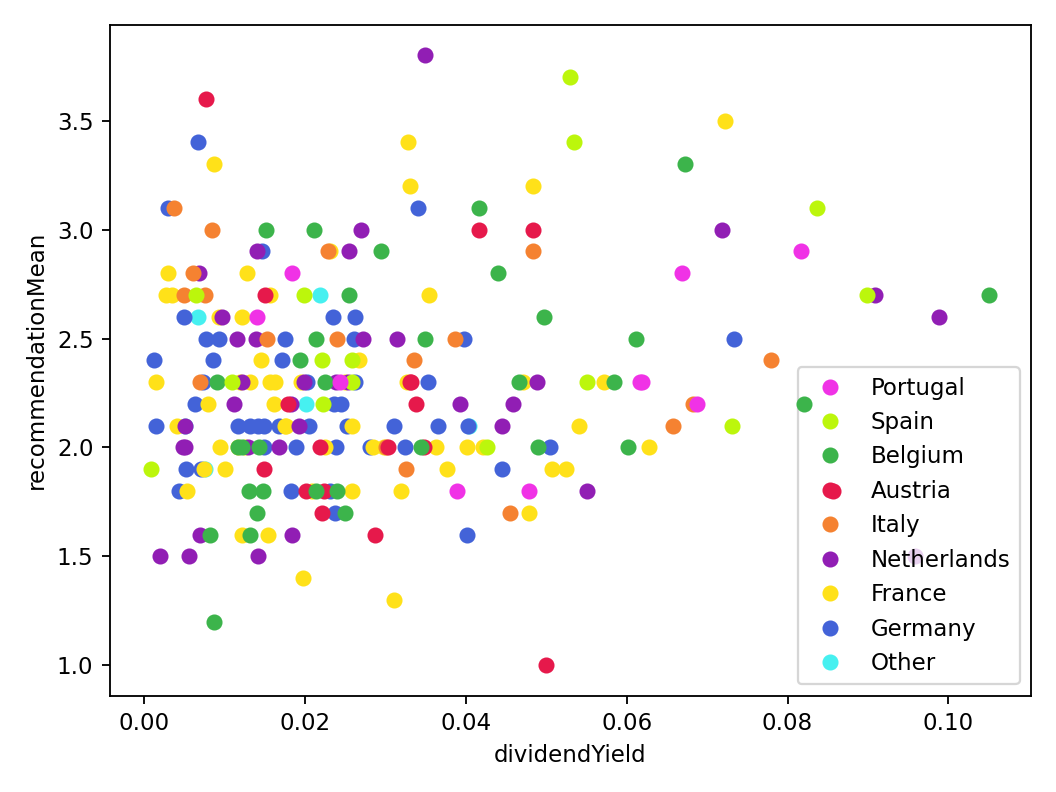

In [35]:
cat_key = 'sector'
cat_key = 'country'
# cat_key = 'industry'

cat_swaps = {None: 'Other', 'United Kingdom': 'Other', 'Luxembourg': 'Other', 'Switzerland': 'Other'}

cats = apply(make_info_key(cat_key), tks)
cats = np.array([cat_swaps.get(cat,cat) for cat in cats])
gcats = sorted(set(c for c in cats if c is not None))
cat_viz = {c:rcolors[i%len(rcolors)] for i,c in enumerate(gcats)}
cat_titles = {}
print(len(gcats), list(gcats))

samples = [vals[(cats == cat)*ok] for cat in gcats]
ysamples = [None for cat in gcats]
ysamples = [vals2[(cats == cat)*ok] for cat in gcats]
seq = sorted(zip(gcats, samples, ysamples), reverse=True, key=lambda x: x[1].mean())
if False:
    fg, ax = plt.subplots()
    plt.hist([x[1] for x in seq], 
             bins=120, 
             stacked=True, label=[f'{cat} ({np.mean(x):.3g})' for cat, x, y in seq])
    plt.xlabel(key)
    plt.ylabel('Count')
    plt.legend()
    plt.tight_layout();
    

fg, ax = plt.subplots()
for i, (cat, x, y) in enumerate(seq):
    plt.plot(x,y, ls='', marker='o', color=cat_viz[cat], label=cat,zorder=len(seq)-i+1)
plt.xlabel(key)
plt.ylabel(key2)
plt.legend()
# handles = [mpatches.Patch(color=cat_viz[c], label=cat) for c,_ in seq]
# cleg = plt.legend(handles, cats, loc=3)
plt.tight_layout();

    
    
# print(tabulate([(n,xs.mean()) for n, xs in seq][:50]))

In [1318]:
def from_to(df, start=None, end=None):
    if start is None and end is None:
        return df
    start = True if start is None else (df.index >= start)
    end = True if end is None else (df.index < end)
    mask = start & end
    return df.loc[mask]

def total_return(df, auto_reinvest=False):
    if auto_reinvest:
        return (1 + (df['Dividends'] / df['Close']).sum()) * df['Close'][-1] / df['Open'][0]
    return (df['Close'][-1] + df['Dividends'].sum()) / df['Open'][0]

In [1320]:
tk = random.choice(options)
tk.ticker
df = tk.history
df = from_to(df, start='2020-12-01', end='2021-12-01')
df.shape
df['Close'][-1]/df['Open'][0], total_return(df), total_return(df, auto_reinvest=True)

(0.7203947494181207, 0.7203947494181207, 0.7203947494181207)

In [200]:
stats = []
for tk in tqdm(options):
    df = tk.history
    df = from_to(df, start='2021-01-01', end='2022-01-01')
    if len(df) > 250:
        stats.append([df['Close'][-1]/df['Open'][0], total_return(df), total_return(df, auto_reinvest=True)])
stats = np.array(stats)
stats.shape

  0%|          | 0/318 [00:00<?, ?it/s]

(313, 3)

In [201]:
stats.mean(0)

array([1.2121205 , 1.24449289, 1.24657309])

In [100]:
# plt.figure()
# plt.plot(stats.T);

In [91]:
tk.history

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2021-07-15,4.650,5.300,4.60,4.800,1673792,0,0
2021-07-16,4.980,4.980,4.66,4.660,352436,0,0
2021-07-19,4.780,4.820,4.67,4.670,145454,0,0
2021-07-20,4.690,4.715,4.45,4.475,221341,0,0
2021-07-21,4.595,4.620,4.41,4.545,253436,0,0
...,...,...,...,...,...,...,...
2022-02-01,5.960,6.050,5.91,5.920,84881,0,0
2022-02-02,5.950,5.980,5.91,5.930,75106,0,0
2022-02-03,5.960,5.960,5.85,5.870,142911,0,0
2022-02-04,5.900,5.990,5.87,5.980,164200,0,0


In [206]:
etfs['EWQ']

TypeError: list indices must be integers or slices, not str

In [653]:
import torch
from torch.nn import functional as F
from torch import optim
from torch import autograd
from src.optim import FeatureExtractor, GroupMatching, PortfolioMatching, FeatureVariance, MultiCriterion, ClipWeight
from scipy import optimize

In [1153]:
tk.info.keys()

dict_keys(['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 'industry', 'ebitdaMargins', 'profitMargins', 'grossMargins', 'operatingCashflow', 'revenueGrowth', 'operatingMargins', 'ebitda', 'targetLowPrice', 'recommendationKey', 'grossProfits', 'freeCashflow', 'targetMedianPrice', 'currentPrice', 'earningsGrowth', 'currentRatio', 'returnOnAssets', 'numberOfAnalystOpinions', 'targetMeanPrice', 'debtToEquity', 'returnOnEquity', 'targetHighPrice', 'totalCash', 'totalDebt', 'totalRevenue', 'totalCashPerShare', 'financialCurrency', 'revenuePerShare', 'quickRatio', 'recommendationMean', 'exchange', 'shortName', 'longName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds', 'underlyingSymbol', 'quoteType', 'symbol', 'underlyingExchangeSymbol', 'headSymbol', 'messageBoardId', 'uuid', 'market', 'annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'ent

In [16]:
feat_keys = [
    'currentPrice',
    'volume',
    'averageVolume', 'averageVolume10days',
    'marketCap',
    'dividendYield',
    'pegRatio', 
    'beta',
    
    'priceToBook', 'payoutRatio',
    'priceToSalesTrailing12Months',
    'ebitdaMargins',
    
    'fiftyDayAverage', 'twoHundredDayAverage',
    
    'fiftyTwoWeekHigh', 'fiftyTwoWeekLow',
    'fullTimeEmployees',
    'heldPercentInsiders', 'heldPercentInstitutions',
    
    'earningsGrowth', 'revenueGrowth',
    'revenuePerShare',
    
    'profitMargins', 'totalCashPerShare',
    'operatingMargins', 'debtToEquity', 'grossMargins',
    'enterpriseToEbitda', 'enterpriseToRevenue',
    
    'trailingAnnualDividendYield', 'trailingEps', 'trailingPE',
    'forwardEps', 'forwardPE',
    
    'numberOfAnalystOpinions',
    'recommendationMean',
    'targetMeanPrice', 'targetMedianPrice',
    'targetLowPrice', 'targetHighPrice',
    
    'bookValue',
    'sharesOutstanding', 
    'grossProfits', 'totalRevenue', 'totalDebt', 'totalCash', 'netIncomeToCommon', 'enterpriseValue',
    
]

In [1257]:
def make_versus_current(key, current='currentPrice', mn=None, mx=None):
    def _fn(tk):
        val = tk.info.get(key)
        if val is None:
            return 0.
        val =  tk.info[key] / tk.info[current]
        if mx is not None:
            val = min(mx, val)
        if mn is not None:
            val = max(mn, val)
        return val
    _fn.key = key
    return _fn

def make_info_key(key, log=False, mn=None, mx=None):
    def _info(tk):
        val = tk.info.get(key)
        if val is None:
            return 0.
        if log:
            val = np.log10(val)
        if mx is not None:
            val = min(mx, val)
        if mn is not None:
            val = max(mn, val)
        return val
    _info.key = key
    return _info

def make_total_return(start=None, end=None, auto_reinvest=False):
    def _return(tk):
        global from_to, total_return
        df = tk.history
        df = from_to(df, start=start, end=end)
        if len(df):
            return total_return(df, auto_reinvest=auto_reinvest)
        return 0.
    return _return

def fn_percentile(tk, fn, tks):
    return np.searchsorted(np.sort(apply(fn, tks)), fn(tk))/len(tks)*100

In [1089]:
options = tks.copy()#[:100]
options.remove(find('ELE.MC'))
len(options)

318

In [1090]:
etftickers.keys()

dict_keys(['PGAL', 'EWP', 'EWQ', 'EWK', 'EWO', 'EWN', 'EWI', 'EWG'])

In [1251]:
sustain_stats.keys()

dict_keys(['eye-brow', 'double-eye-brow', 'environmentScore', 'governanceScore', 'socialScore', 'totalEsg', 'environmentPercentile', 'governancePercentile', 'socialPercentile'])

In [1379]:

# def plot_pie(groups, colors=None, fgax=None):
#     if fgax is None:
#         fgax = plt.subplots()

#     groups = sorted(groups, reverse=True, key=lambda item: (item[1], item[0] is None, item[0]))
#     labels, sizes = zip(*groups)
#     sizes = [100 * x for x in sizes]
#     explode = [0] * len(labels)
#     cs = colors if colors is None else [colors.get(label) for label in labels]
    
#     #     print(cs)
#     fg, ax = fgax
#     plt.sca(ax)
#     plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
#             colors=cs,
#             #         shadow=True,
#             startangle=0);
#     plt.tight_layout()
#     return fgax

# def find(tbl, **items):
#     for item in tbl:
#         for k,v in items.items():
#             if k in item and item[k] != v:
#                 break
#         else:
#             return item

def replace(tbl, **items):
    for item in tbl:
        for k,reps in items.items():
            if k in item and item[k] in reps:
                item[k] = reps[item[k]]
    return tbl

def plot_piece_pie(tbl, colors=None, groupkey='sector', tkkey='ticker', numkey='ratio', silent=True, explode=0.05,
                   fgax=None, figsize=(9,5)):
    groups = group_cats(tbl, groupkey, silent=silent)
    if colors is None:
        colors = {sec: f'C{i}' for i, (sec, n) in enumerate(groups)}
    order, tots = zip(*groups)
    tks, secs, slcs = zip(*[[item.get(tkkey), item.get(groupkey), item.get(numkey) * 100] for item in
                            sorted(tbl, key=lambda item: (order.index(item.get(groupkey)), -item.get(numkey)))])
    explode = [explode] * len(secs)
    cs = [colors.get(sec,'w') for sec in secs]
    # ocs = [colors.get(o) for o in order]
    if fgax is None:
        fgax = plt.subplots(figsize=figsize)
    fg, ax = fgax
    plt.sca(ax)
    plt.pie(slcs, explode=explode, labels=tks, autopct='%1.1f%%',
            colors=cs, startangle=0);
    plt.legend(handles=[mpatches.Patch(color=colors.get(o, 'w'), label=f'{o} ({t*100:1.1f}%)') for o, t in groups],
               loc='center left', bbox_to_anchor=(1.1, 0.5))
    plt.tight_layout();
    return fgax


In [1393]:
base_sectors = [
    'Technology', 
    'Healthcare',
    'Industrials', 
    'Financial Services', 
    'Communication Services', 
    'Consumer Cyclical', 
    'Consumer Defensive', 
    'Basic Materials', 
    'Utilities', 
    'Energy', 
    'Real Estate',
    '',
]
seccolors = {b:c for b,c in zip(base_sectors, rcolors)}

sector_aliases = {
    'Financial': 'Financial Services',
    'Consumer Discretionary': 'Consumer Cyclical',
    None:'',
    0.:'',
    0:'',
    '0.':'',
    '0.0':'',
    'Services': 'Consumer Cyclical',
    'Industrial Goods': 'Industrials',
    'Consumer Goods': 'Consumer Defensive',
}

def plot_piece_pie(tks, nums, key='sector', colors=None, silent=True, explode=0.05, aliases={}, fgax=None, figsize=(9,5)):
    cats = apply(make_info_key(key), tks)
    cats = [aliases.get(str(cat), str(cat)) for cat in cats]
    groups = sorted(list(set(cats)))
    rcolors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080']
    if colors is None:
        colors = {cat: rcolors[i%len(rcolors)] for i, cat in enumerate(groups)}
    cats, nums, names = zip(*sorted(zip(cats, nums, [tk.ticker for tk in tks])))
    explode = [explode] * len(cats)
    cs = [colors.get(cat,'w') for cat in cats]
    # ocs = [colors.get(o) for o in order]
    tots = {cat:0 for cat in groups}
    for cat, num in zip(cats, nums):
        tots[cat] += num
    if fgax is None:
        fgax = plt.subplots(figsize=figsize)
    fg, ax = fgax
    plt.sca(ax)
    plt.pie(nums, explode=explode, labels=names, autopct='%1.1f%%',
            colors=cs, startangle=0);
    plt.legend(handles=[mpatches.Patch(color=colors.get(cat, 'w'), label=f'{cat} ({tots[cat]*100:1.1f}%)') for cat in sorted(groups, key=lambda x: tots[x],reverse=True)],
               loc='center left', bbox_to_anchor=(1.1, 0.5))
    plt.tight_layout();
    return fgax

In [ ]:
scores = ['environmentScore', 'governanceScore', 'socialScore', 'totalEsg']
percentiles = ['environmentPercentile', 'governancePercentile', 'socialPercentile', ]

In [1374]:
ptfs = {
    'EWG': 4.,
    'EWQ': 4.,
    'EWN': 4.,
    
    'EWI': 4.,
    'EWP': 1.,
    
    'EWK': 3.,
    'EWO': 3.,
    'PGAL': 1.,
}
pf_wt = 0.5
_n = sum(ptfs.values())
ptfs = {k:v/_n*pf_wt for k,v in ptfs.items()}
# cr1 = PortfolioMatching(etftickers['EWG']['portfolio'], wt=1.)

cap_cr = FeatureVariance(make_info_key('marketCap',log=True), wt=.1)

feats = [
    (-10., make_info_key('beta')),
    (1., make_info_key('pegRatio',mn=-10,mx=10)),
    (5., make_info_key('trailingEps')),
    (10., make_info_key('dividendYield')),
    
    (12, make_info_key('heldPercentInsiders')),
    (8, make_info_key('heldPercentInstitutions')),
    
    (20, make_info_key('recommendationMean')),
    (.1, make_info_key('numberOfAnalystOpinions')),
    (5, make_versus_current('targetMeanPrice',mn=0.2,mx=3)),
    (1, make_versus_current('targetMedianPrice',mn=0.2,mx=3)),
    (2, make_versus_current('targetLowPrice',mn=0.2,mx=3)),
    (1, make_versus_current('targetHighPrice',mn=0.2,mx=3)),
    
    
    (4, make_sustain_key('totalEsg')),
    (.1, make_sustain_key('socialScore')),
    (.1, make_sustain_key('governanceScore')),
    (.1, make_sustain_key('environmentScore')),
#     (1, make_sustain_key('socialPercentile')),
#     (1, make_sustain_key('governancePercentile')),
#     (1, make_sustain_key('environmentPercentile')),
    
]
feat_cr = FeatureExtractor(feats, wt=1.)

ret_feats = [
    (50., make_total_return(start='2021-01-01', end='2022-01-01')),
    (50., make_total_return(start='2020-01-01', end='2021-01-01')),
    (25., make_total_return(start='2019-01-01', end='2020-01-01')),
    (100., make_total_return(start='2015-01-01', end='2019-01-01')),
]
ret_cr = FeatureExtractor(ret_feats, wt=0.8)

sec_cr = GroupMatching({
    'Consumer Defensive': 1.0,
    'Financial Services': 3.0,
    'Utilities': 1.0,
    'Technology': 6.0,
    'Energy': -1.0,
    'Consumer Cyclical': 2.0,
    'Communication Services': 3.0,
    'Industrials': 4.0,
    'Healthcare': 4.0,
    'Basic Materials': 2.0,
    'Real Estate': 4.0,
}, make_info_key('sector'), wt=1.,)

ind_cr = GroupMatching({
    'Auto & Truck Dealerships':-1, 'Auto Manufacturers':-1, 'Auto Parts':-1,
}, make_info_key('industry'), wt=.07)

clip_cr = ClipWeight(0.1, p=2, wt=100)

criteria = [
#     *[PortfolioMatching(etftickers[name]['portfolio'], wt=w) for name, w in ptfs.items()],
    cap_cr, 
    feat_cr,
#     ret_cr,
#     sec_cr,
#     ind_cr,
    
    clip_cr,
]
cr = MultiCriterion(criteria)
# cr = cr5
cr.prepare(options)

In [1375]:
q = torch.randn(len(options)) * 0.
x = q.detach().numpy()
q.shape
# q.requires_grad = True
# loss = cr.loss(F.softmax(q))
# loss
# g = autograd.grad(loss, q)[0]
# g.norm()

torch.Size([318])

In [1376]:
lasso = 0.
# lasso = 2.
def _loss(q, lmbda=None):
    if lmbda is None:
        lmbda = lasso
    else:
        lmbda = 0.
    w = q + lmbda * torch.randn_like(q)
    w = F.softmax(w,0)
    return cr(w).mul(-1)
def _forward(q, loss_fn=None):
    if loss_fn is None:
        loss_fn = _loss
    q = torch.from_numpy(q).float()
    return loss_fn(q).detach().numpy()
def _grad(q, loss_fn=None):
    if loss_fn is None:
        loss_fn = _loss
    q = torch.from_numpy(q).float()
    q.requires_grad = True
    loss = loss_fn(q)
    return autograd.grad(loss, q)[0].detach().numpy()

out = optimize.minimize(_forward, 
                        x0=x,
                    jac=_grad,
                  method='BFGS',
#                   method='CG',
                 )
x = out.x
out.fun, out.nit, out.success

(-1.3857011795043945, 126, False)

In [1377]:
best = torch.from_numpy(x).float()
init = F.softmax(q,0).detach()
best = F.softmax(best,0)
# print([f'{i.item():1.3f}' for i in best])
# best.mul(1000).round().div(1000)

In [1378]:
pf = list(zip(options, best))
print(tabulate([[f'{r*100:.2g}', tk.ticker, tk.info.get('shortName'), tk.info.get('country'), tk.info.get('sector'), tk.info.get('industry'), *eye_brows(tk), fn_percentile(tk, fn, options)] 
                for tk, r in sorted(pf, key=lambda x: (x[1], x[0].ticker), reverse=True)[:20]], headers=['%', 'Symbol', 'Name', 'Country', 'Sector', 'Industry', 'Eye', 'Double Eye', 'Market Cap (%)']))

       %  Symbol    Name                   Country      Sector                  Industry                                Eye                            Double Eye                                      Market Cap (%)
--------  --------  ---------------------  -----------  ----------------------  --------------------------------------  -----------------------------  --------------------------------------------  ----------------
15        DTG.DE    DAIMLER TRUCK HOLD     Germany      Industrials             Farm & Heavy Construction Machinery     []                             []                                                     1.25786
10        MC.PA     LVMH                   France       Consumer Cyclical       Luxury Goods                            ['alcoholic']                  []                                                    44.9686
10        NESN.SW   NESTLE N               Switzerland  Consumer Defensive      Packaged Foods                          ['animalTesting']        

<IPython.core.display.Javascript object>


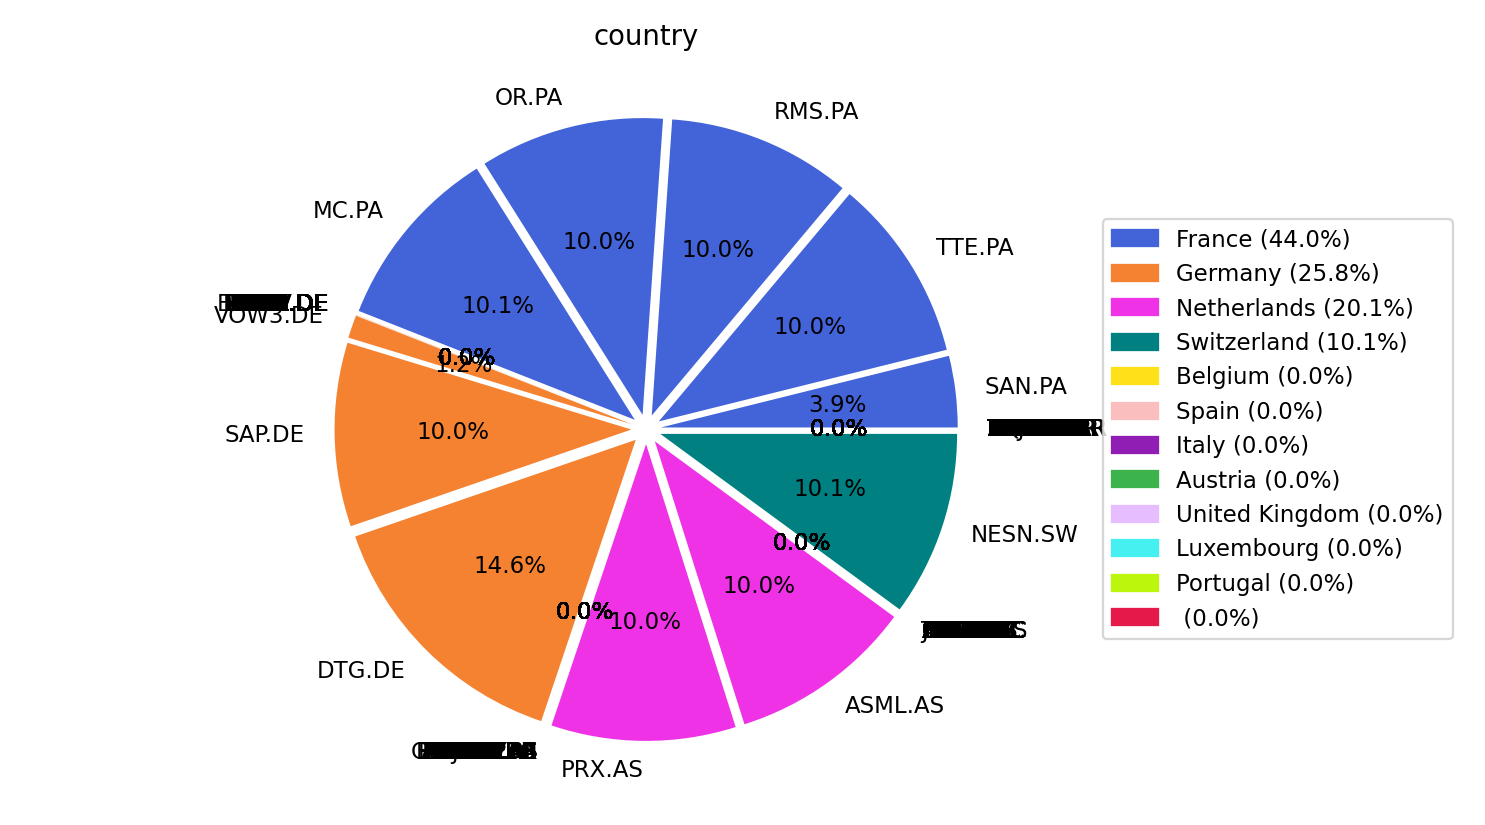

<ipython-input-1405-e679b86455f7>:19: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(nums, explode=explode, labels=names, autopct='%1.1f%%',


<IPython.core.display.Javascript object>


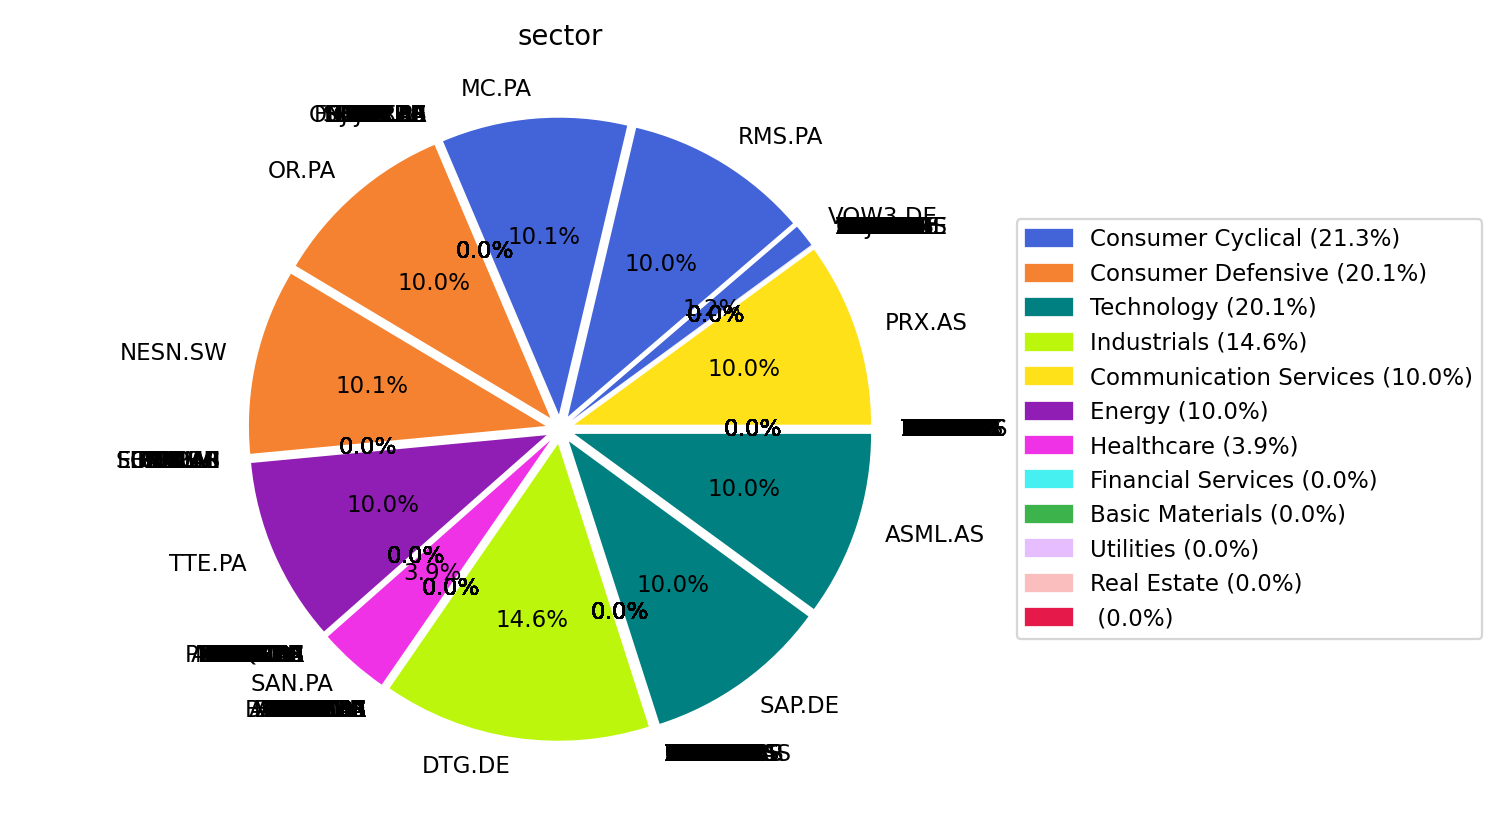

In [1408]:
for key in [
    'country', 
    'sector', 
#     'industry',
]:
    plot_piece_pie(options, best.tolist(), key=key, colors=None, aliases=sector_aliases);
    plt.title(key)
    plt.tight_layout()

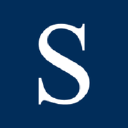

SOF.BR - SOFINA

Sector: Financial Services
Industry: Asset Management

Location: Brussels, Belgium

Recommendation: -1.0 (10.3%)
PEG: nan
Beta: 0.8
MarketCap (log): 10.06577415864362
Yield: 0.8%

Sofina Société Anonyme

Sofina SociÃ©tÃ© Anonyme is a private equity and venture capital firm specializing in direct and fund of funds
investments. Within direct investments, it specializes in growth capital, early, startup, later stages, mature, emerging
growth, mid venture, late venture, industry consolidation, and LBO investments. The firm primarily invests in portfolio
of companies that engages in digital transformation, consumer & retail, education, healthcare, energy and services,
e-commerce, consumer goods, digital, satellite operations, industry, finance companies, and financial services
worldwide. It also invests in the media, communications, insurance, property development sectors. The firm typically
invests in European based companies with a global exposure, and it also has a parti

<IPython.core.display.Javascript object>


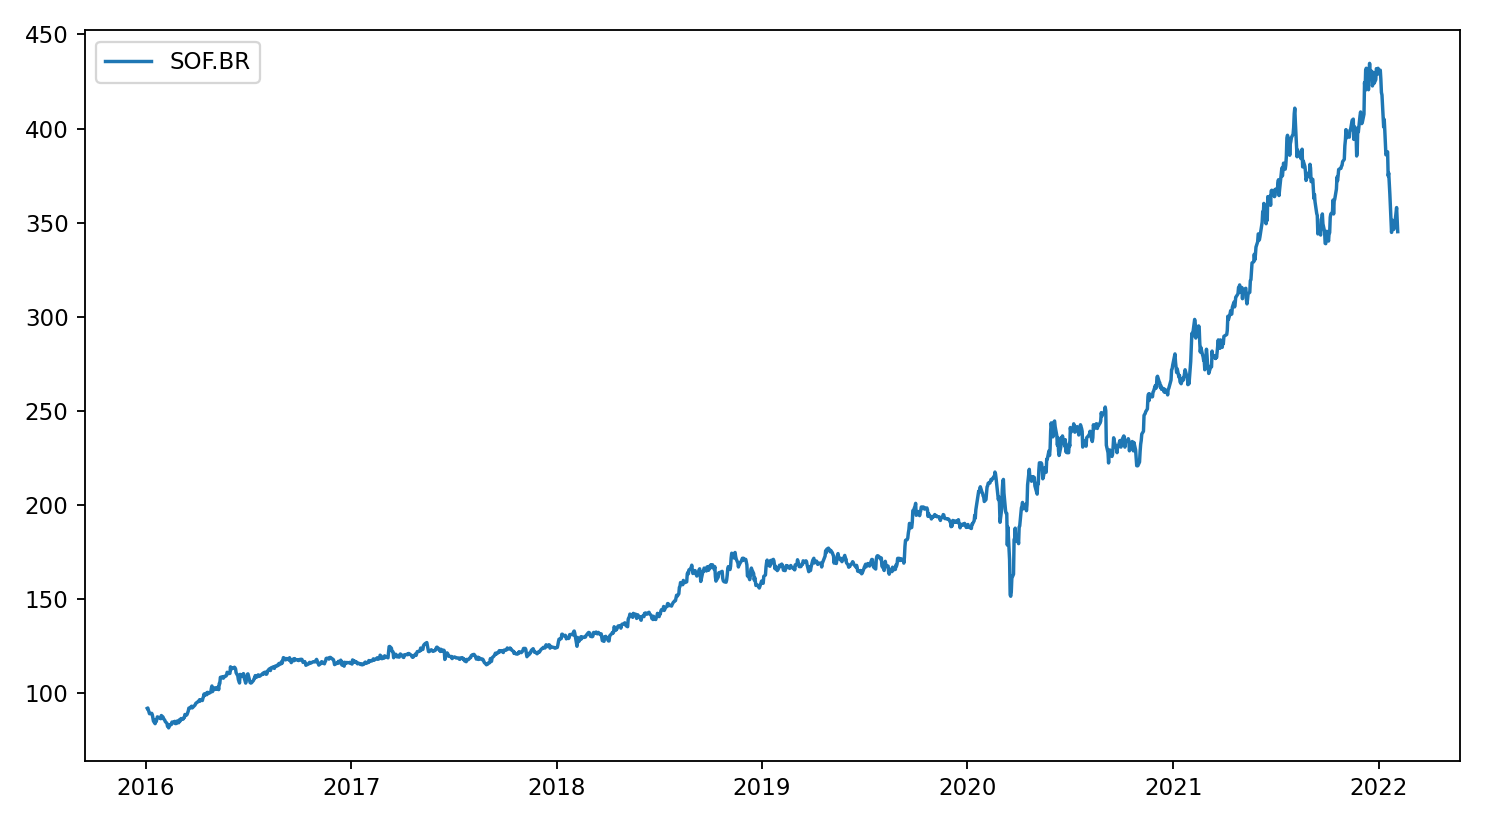

In [1351]:
tk = find('SOF')
profile, img = yahoo.profile_item(tk, 120)
display(img)
print(profile)
print(tabulate([[fn.key, fn(tk), f'{fn_percentile(tk, fn, options):1.1f}'] for w, fn in [*feats, (0,make_info_key('marketCap',log=True))]]))
print(*eye_brows(tk))
print([f'{fn(tk):1.2f}' for _, fn in ret_feats])
plt.figure(figsize=(9,5))
# for tk in full[:10]:
df = tk.history
df = from_to(df, start='2016-01-01')
date_array  = df.index
price_array = df['Close']
plt.plot(date_array, price_array, linestyle = 'solid', label=tk.ticker);
plt.legend();
plt.tight_layout();

[1.297530813962963, 1.6689655172413793, 1.7074911856000092, 11.359999593093333]

In [1051]:
# key = 'pegRatio'
# vals = apply(make_info_key('recommendationMean'), options)
# plt.figure()
# plt.title(key)
# plt.hist(vals,bins=20);

([], [])

In [1194]:
# {x for x in {tk.info.get('industry'):0. for tk in options} if x is not None and 'Auto' in x}

In [1195]:
self = cr

In [1191]:
# best.max(0)
# best.gt(0.001).sum()
# print([f'{i.item():1.4f}' for i in init])
# init.mul(1000).round().div(1000)
F.normalize(best,2,0) @ F.normalize(init,2,0)

tensor(0.1818)

In [929]:
tk.info['recommendationMean']

1.8

In [344]:
tk.earnings

,Revenue,Earnings
2017,6693454000,1316218000
2018,6971401000,1793446000
2019,7222800000,1470100000
2020,5861400000,783100000


In [363]:
tk.quarterly_earnings

,Revenue,Earnings
2020-10-01,1444962000,146019000
2021-01-01,1792517000,355090000
2021-04-01,1914900000,562900000
2021-07-01,1975600000,533400000


In [381]:
profit = tk.info['totalRevenue']
profit

7129083904

In [382]:
tk.info['earningsGrowth']

0.543

In [383]:
profit / e[-1]

13.365361649793776

In [388]:
e = tk.earnings['Revenue'].to_numpy()
# e = tk.quarterly_earnings['Revenue'].to_numpy()
e

array([6693454000, 6971401000, 7222800000, 5861400000], dtype=int64)

In [389]:
from scipy.stats import linregress

In [390]:
x = np.arange(len(e))
m, y0, *other = linregress(x, e)
m

-224476300.0

<IPython.core.display.Javascript object>


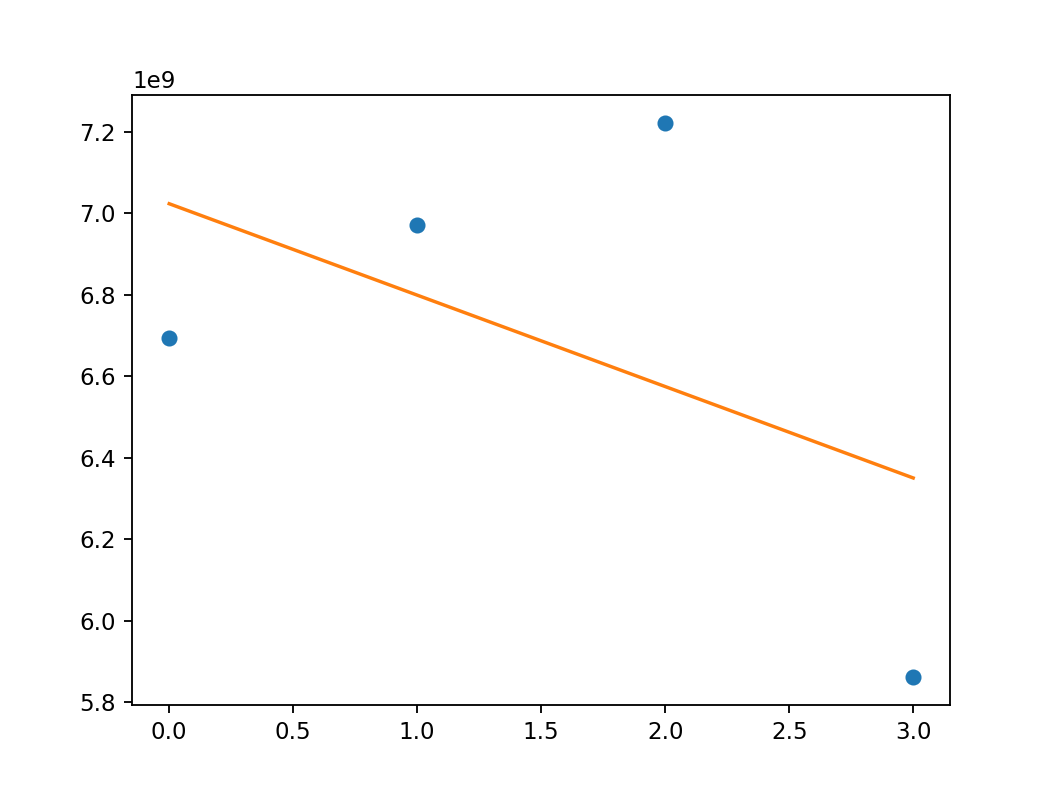

In [391]:
plt.figure()
plt.plot(x, e, ls='', marker='o')
plt.plot(x, y0+m*x);

In [ ]:
m / x[-1]

In [ ]:
import networkx as nx
plt.figure(figsize=(7, 7))

dt = [('len', float)]
A = delta
A = A.view(dt)

G = nx.from_numpy_matrix(A) 
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=50)

lgd = plt.legend(markers, labels, numpoints=1, bbox_to_anchor=(1.17, 0.5))
plt.tight_layout()
plt.axis('equal')
plt.show()

In [59]:


cmap = plt.get_cmap('Set1')
# colors = [cmap(i) for i in numpy.linspace(0, 1, simulations)]

plt.figure(figsize=(7, 7))
plt.scatter(coords[:, 0], coords[:, 1], marker='o', c=colors, s=50, edgecolor='None')

markers = []
labels = [str(n+1) for n in range(simulations)]
# for i in range(simulations):
#     markers.append(Line2D([0], [0], linestyle='None', marker="o", markersize=10, markeredgecolor="none", markerfacecolor=colors[i]))
lgd = plt.legend(markers, labels, numpoints=1, bbox_to_anchor=(1.17, 0.5))
plt.tight_layout()
plt.axis('equal')
plt.show()

C:\Users\anwan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


NameError: name 'simulations' is not defined

In [60]:
coords

array([[ 111.09251  , -133.72295  ],
       [  34.946613 ,  107.06459  ],
       [ -28.088213 , -159.94904  ],
       [ 147.69807  ,   21.369604 ],
       [ -97.50118  ,  126.981384 ],
       [  30.312096 ,  -32.794945 ],
       [-155.44366  , -118.49469  ],
       [-204.24811  ,   22.59613  ],
       [ -79.40468  ,   -6.8647175]], dtype=float32)

In [39]:
df1, df2 = tks[0].history[col], tks[1].history[col]
# df1, df2 = df1.rename({col:tks[0].ticker}), df2.rename({col:tks[1].ticker})
df = pd.merge_asof(df1, df2, left_index=True, right_index=True, tolerance=pd.Timedelta("5m"))
df.rename(columns={f'{col}_x':tks[0].ticker, f'{col}_y':tks[1].ticker}, inplace=True)
df

,SAP.DE,SIE.DE
1998-04-09,25.813625,21.360640
1998-04-10,25.813625,21.360640
1998-04-14,27.026766,21.413734
1998-04-15,29.675066,21.112370
1998-04-16,28.916918,20.952581
...,...,...
2022-01-31,110.400002,139.880005
2022-02-01,113.000000,140.940002
2022-02-02,112.099998,140.520004
2022-02-03,109.099998,136.820007


In [23]:
df[df.index.year == 2021].corr()

,SAP.DE,SIE.DE
SAP.DE,1.000000,0.595962
SIE.DE,0.595962,1.000000


In [9]:
# print(etfs)

In [19]:
tk = yf.Ticker('EWG')
tk

yfinance.Ticker object <EWG>

In [20]:
tk.info

{'exchange': 'PCX',
 'shortName': 'iShares MSCI Germany Index Fund',
 'longName': 'iShares MSCI Germany ETF',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EST',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '-18000000',
 'quoteType': 'ETF',
 'symbol': 'EWG',
 'messageBoardId': 'finmb_6457034',
 'market': 'us_market',
 'annualHoldingsTurnover': None,
 'enterpriseToRevenue': None,
 'beta3Year': 1.23,
 'profitMargins': None,
 'enterpriseToEbitda': None,
 '52WeekChange': None,
 'morningStarRiskRating': None,
 'forwardEps': None,
 'revenueQuarterlyGrowth': None,
 'fundInceptionDate': 826588800,
 'annualReportExpenseRatio': None,
 'totalAssets': 2474716928,
 'bookValue': None,
 'fundFamily': 'iShares',
 'lastFiscalYearEnd': None,
 'netIncomeToCommon': None,
 'trailingEps': None,
 'lastDividendValue': None,
 'SandP52WeekChange': None,
 'priceToBook': None,
 'nextFiscalYearEnd': None,
 'yield': 0.0287,
 'mostRecentQuarter': None,
 'enterpriseValue': None,
 

In [13]:
print(pf)

{'ticker': 'EWG', 'country': 'Germany', 'portfolio': {'SAP.DE': 0.0868, 'SIE.DE': 0.0806, 'ALV.DE': 0.0706, 'BAS.DE': 0.0467, 'DAI.DE': 0.0451, 'DTE.DE': 0.0418, 'BAYN.DE': 0.0398, 'DPW.DE': 0.039599999999999996, 'IFX.DE': 0.035699999999999996, 'ADS.DE': 0.0347, 'MUV2.DE': 0.0294, 'VNA.DE': 0.027999999999999997, 'VOW3.DE': 0.0256, 'BMW.DE': 0.0232, 'DB1.DE': 0.0225, 'EOAN.DE': 0.0207, 'DBK.DE': 0.0191, 'MRK.DE': 0.0189, 'RWE.DE': 0.018000000000000002, 'SHL.DE': 0.0121, 'ZAL.DE': 0.011699999999999999, 'FRE.DE': 0.0115, 'SY1.DE': 0.0103, 'DTG.DE': 0.0097, 'HEN3.DE': 0.0097, 'PAH3.DE': 0.0095, 'SRT3.DE': 0.009399999999999999, 'FME.DE': 0.009300000000000001, 'BNR.DE': 0.0088, 'DHER.DE': 0.0083, 'HNR1.DE': 0.008100000000000001, '1COV.DE': 0.0077, 'QGEN.DE': 0.0075, 'MTX.DE': 0.0075, 'PUM.DE': 0.0075, 'HFG.DE': 0.0073, 'CON.DE': 0.006999999999999999, 'HEI.DE': 0.0069, 'BEI.DE': 0.0067, 'LEG.DE': 0.0064, 'VOW.DE': 0.0062, 'ENR.DE': 0.0059, 'CBK.DE': 0.005699999999999999, 'HEN.DE': 0.005500000

In [19]:
sel = dts.year == 2021
sel.sum()

256

In [30]:
tr = full[3].history#['Close']
sel = tr.index.year == 2021
seq = tr[sel]
seq

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2021-01-04,401.802006,408.763922,400.061527,404.039764,789502,0.0,0.0
2021-01-05,404.338116,409.808193,398.967502,404.686218,798787,0.0,0.0
2021-01-06,404.586756,404.984604,397.028128,400.658264,875711,0.0,0.0
2021-01-07,402.597643,405.581321,398.171871,401.702545,874780,0.0,0.0
2021-01-08,411.996243,416.819862,411.150862,413.786438,975243,0.0,0.0
...,...,...,...,...,...,...,...
2021-12-27,700.000000,715.599976,695.400024,713.099976,347324,0.0,0.0
2021-12-28,716.799988,724.500000,711.000000,715.299988,331884,0.0,0.0
2021-12-29,716.000000,716.500000,699.500000,703.500000,313441,0.0,0.0
2021-12-30,709.000000,718.299988,706.200012,710.400024,454118,0.0,0.0


In [31]:
seq.corr()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.998529,0.997779,0.995186,-0.232151,0.027338,NaN
High,0.998529,1.000000,0.998059,0.997450,-0.223040,0.028092,NaN
Low,0.997779,0.998059,1.000000,0.998341,-0.258097,0.031462,NaN
Close,0.995186,0.997450,0.998341,1.000000,-0.255399,0.030697,NaN
Volume,-0.232151,-0.223040,-0.258097,-0.255399,1.000000,-0.053355,NaN
Dividends,0.027338,0.028092,0.031462,0.030697,-0.053355,1.000000,NaN
Stock Splits,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
tk.history['Close']

1995-03-24    0.365557
1995-03-28    0.373289
1995-03-31    0.376100
1995-04-17    0.386646
1995-04-25    0.377858
                ...   
2022-01-31    2.619500
2022-02-01    2.670000
2022-02-02    2.697000
2022-02-03    2.728000
2022-02-04    2.667000
Name: Close, Length: 6740, dtype: float64

In [4]:
# tk = yf.Ticker('NVDA')
# pd.read_json(tk.recommendations.to_json(orient="split"), orient='split')

In [5]:
full[0].history

TypeError: argument of type 'NoneType' is not iterable